In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [27]:
# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Plot original noisy data

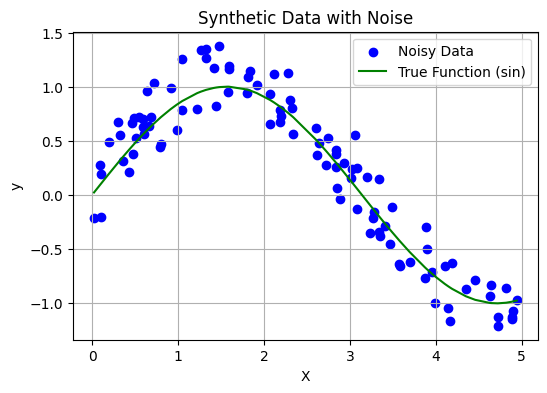

In [28]:
# Plot original noisy data
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Noisy Data')
plt.plot(X, np.sin(X), color='green', label='True Function (sin)')
plt.title("Synthetic Data with Noise")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Us

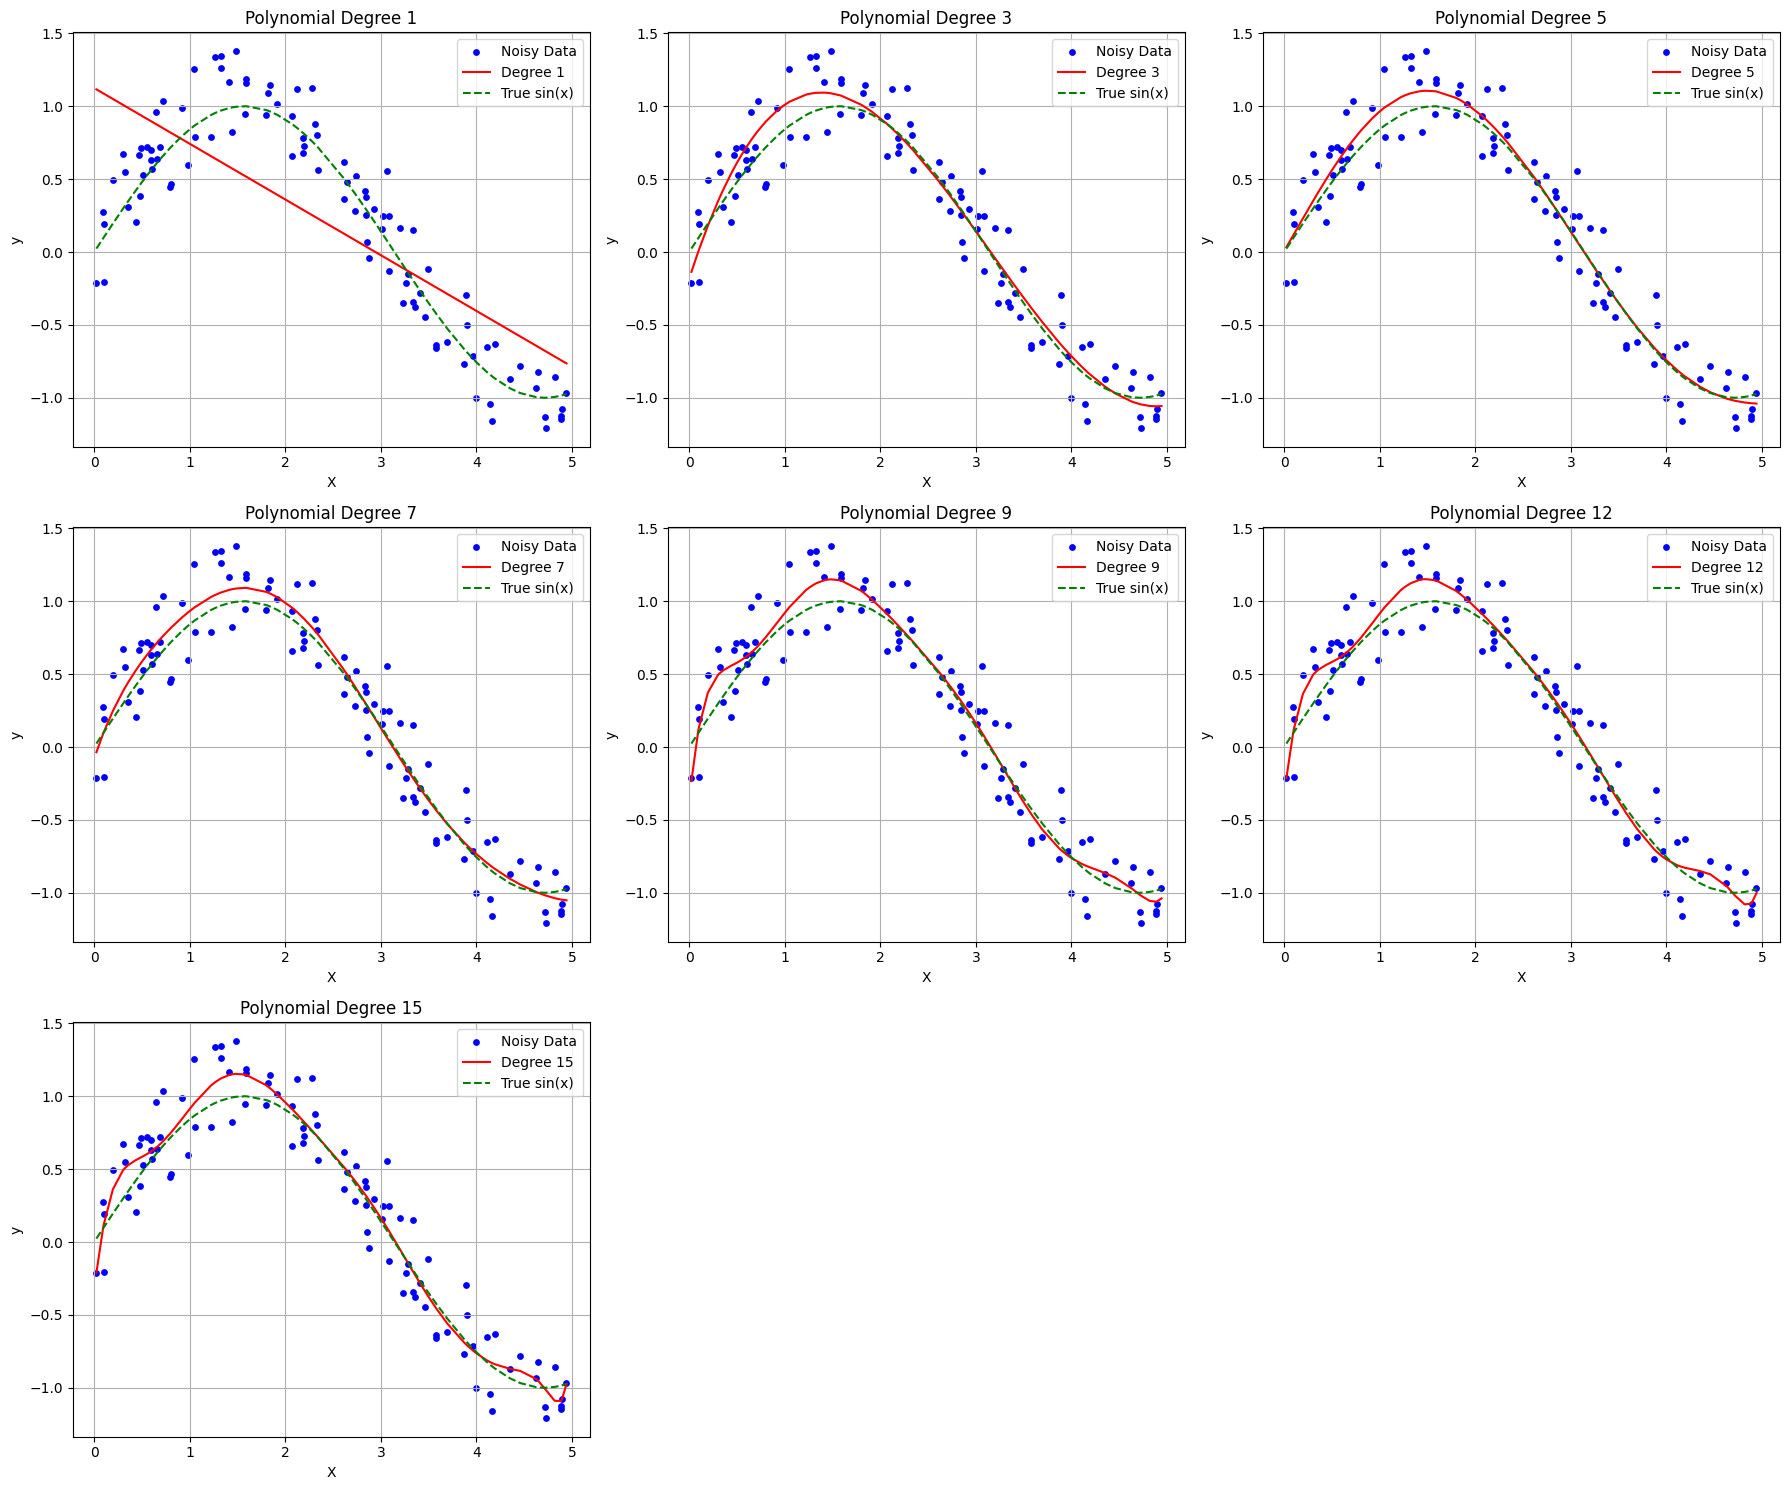

In [29]:
degrees = [1, 3, 5, 7, 9, 12, 15]  # Added degrees 7, 12, and 15
plt.figure(figsize=(18, 15))       # Make figure larger to fit more plots

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    plt.subplot(3, 3, i)  # 3x3 grid because 7 plots (row=3, col=3)
    plt.scatter(X, y, color='blue', s=15, label='Noisy Data')
    plt.plot(X, y_pred, color='red', label=f'Degree {degree}')
    plt.plot(X, np.sin(X), color='green', linestyle='--', label='True sin(x)')
    plt.title(f"Polynomial Degree {degree}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/dibbyoroy/Desktop/MachineLearningLab/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Us

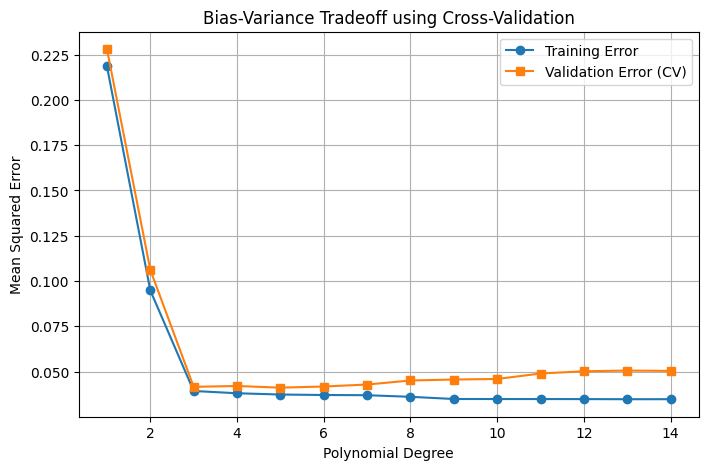

In [30]:
train_errors = []
val_errors = []
degrees = range(1, 15)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()

    # Training error (fit on full data and predict)
    model.fit(X_poly, y)
    y_train_pred = model.predict(X_poly)
    train_mse = mean_squared_error(y, y_train_pred)

    # Validation error (use cross-validation directly without fitting first)
    val_mse = -cross_val_score(
        Pipeline([
            ('poly', PolynomialFeatures(degree)),
            ('linreg', LinearRegression())
        ]),
        X, y, cv=kf, scoring='neg_mean_squared_error'
    ).mean()

    train_errors.append(train_mse)
    val_errors.append(val_mse)

# Plotting remains the same
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, marker='o', label='Training Error')
plt.plot(degrees, val_errors, marker='s', label='Validation Error (CV)')
plt.title("Bias-Variance Tradeoff using Cross-Validation")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

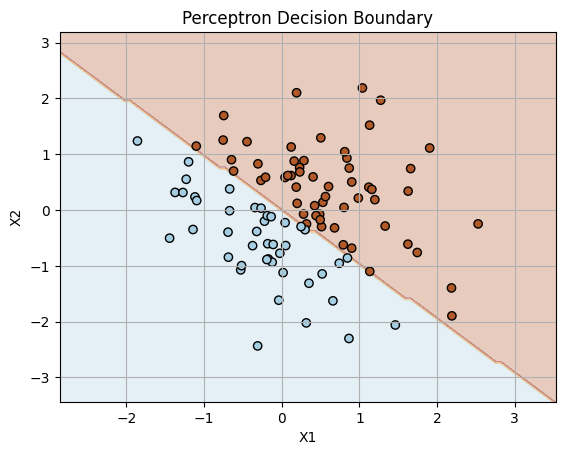

In [25]:

# ================================
# Part 2: Perceptron from Scratch
# ================================

# Create linearly separable binary data
np.random.seed(1)
X_percep = np.random.randn(100, 2)
y_percep = (X_percep[:, 0] + X_percep[:, 1] > 0).astype(int)

# Perceptron class
class Perceptron:
    def __init__(self, lr=0.1, epochs=10):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def activation(self, z):
        return np.where(z > 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for epoch in range(self.epochs):
            for xi, yi in zip(X, y):
                z = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(z)
                update = self.lr * (yi - y_pred)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

# Train perceptron
model = Perceptron(lr=0.1, epochs=10)
model.fit(X_percep, y_percep)
y_pred = model.predict(X_percep)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_percep, y_percep, model)